In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv(r"C:\Users\hp\project_cao\CAO.csv")
data

,Timestamp,NAME,GENDER,LOCATION (CITY),AGE,1.How often do you feel overwhelmed by academic pressure?,2.Have you ever experienced symptoms of anxiety such as restlessness or excessive worry during your college years?,3.Do you feel comfortable discussing your mental health concerns with your peers?,4.Have you ever sought professional help (therapy) for your mental health while in college?,5.Have you ever considered dropping out of college due to academic stress or mental health concerns?,6.Do you feel that peer pressure or societal expectations contribute to your feelings of insecurity in college?,7.Do you think your university or college supports students mental health needs?,Medical Attention Required?(Yes or No)
0,10-1-2023 23:05:32,Ishan D. Jain,MALE,Chennai,18-20 years,Often,Sometimes,Sometimes,Often,Never,Rarely,Never,NO
1,10-1-2023 23:06:47,Manas Kamal Das,MALE,Chennai,18-20 years,Often,Often,Never,Never,Never,Often,Rarely,YES
2,10-1-2023 23:07:10,Suchith,MALE,Vit hostel,18-20 years,Often,Sometimes,Rarely,Never,Never,Sometimes,Never,YES
3,10-1-2023 23:07:55,Kalp patel,MALE,Ahemdabad,18-20 years,Rarely,Rarely,Sometimes,Never,Never,Rarely,Rarely,NO
4,10-1-2023 23:09:56,Bharathi R,FEMALE,Chennai,18-20 years,Sometimes,Sometimes,Never,Rarely,Never,Sometimes,Rarely,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10-3-2023 16:43:20,PATEL VAISHNAVI RAJNESHKUMAR,FEMALE,SURAT,18-20 years,Never,Never,Often,Never,Never,Never,Often,NO
96,10-4-2023 8:54:30,Diwakar Upadhyay,MALE,Sahawa,20-23 years,Sometimes,Rarely,Often,Never,Rarely,Never,Rarely,NO
97,10-4-2023 16:20:34,Abubakar Siddiq,MALE,Chennai,18-20 years,Rarely,Rarely,Often,Often,Never,Rarely,Often,NO
98,10-7-2023 13:37:56,Arjun,MALE,Chennai,18-20 years,Often,Never,Sometimes,Never,Sometimes,Never,Rarely,NO


In [3]:
import pandas as pd

#DataFrame called 'data'
data = pd.read_csv(r"C:\Users\hp\project_cao\CAO.csv")

# List of column names to drop
columns_to_drop = ['Timestamp', 'NAME', 'GENDER', 'LOCATION (CITY)', 'AGE']

# Dropping the specified columns
data = data.drop(columns=columns_to_drop)

# Now, 'data' contains only the columns you want for your ML model


In [4]:
dataMapping={
    "Often": 5,
    "Sometimes": 4,
    "Rarely": 3,
    "Never": 2,
    "YES": 1,
    "NO": 0
}

In [5]:
columns_to_map = [
    '1.How often do you feel overwhelmed by academic pressure?',
    '2.Have you ever experienced symptoms of anxiety such as restlessness or excessive worry during your college years?',
    '3.Do you feel comfortable discussing your mental health concerns with your peers?',
    '4.Have you ever sought professional help (therapy) for your mental health while in college?',
    '5.Have you ever considered dropping out of college due to academic stress or mental health concerns?',
    '6.Do you feel that peer pressure or societal expectations contribute to your feelings of insecurity in college?',
    '7.Do you think your university or college supports students mental health needs?',
    'Medical Attention Required?(Yes or No)'
]

for column in columns_to_map:
    data[column] = data[column].map(dataMapping)

data

,1.How often do you feel overwhelmed by academic pressure?,2.Have you ever experienced symptoms of anxiety such as restlessness or excessive worry during your college years?,3.Do you feel comfortable discussing your mental health concerns with your peers?,4.Have you ever sought professional help (therapy) for your mental health while in college?,5.Have you ever considered dropping out of college due to academic stress or mental health concerns?,6.Do you feel that peer pressure or societal expectations contribute to your feelings of insecurity in college?,7.Do you think your university or college supports students mental health needs?,Medical Attention Required?(Yes or No)
0,5,4,4,5,2,3,2,0
1,5,5,2,2,2,5,3,1
2,5,4,3,2,2,4,2,1
3,3,3,4,2,2,3,3,0
4,4,4,2,3,2,4,3,1
...,...,...,...,...,...,...,...,...
95,2,2,5,2,2,2,5,0
96,4,3,5,2,3,2,3,0
97,3,3,5,5,2,3,5,0
98,5,2,4,2,4,2,3,0


In [6]:
# Split dataset into features (X) and labels (y)
from sklearn.model_selection import train_test_split
out_drop=['Medical Attention Required?(Yes or No)']
x = data.drop(columns=out_drop)
y = data['Medical Attention Required?(Yes or No)']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x


,1.How often do you feel overwhelmed by academic pressure?,2.Have you ever experienced symptoms of anxiety such as restlessness or excessive worry during your college years?,3.Do you feel comfortable discussing your mental health concerns with your peers?,4.Have you ever sought professional help (therapy) for your mental health while in college?,5.Have you ever considered dropping out of college due to academic stress or mental health concerns?,6.Do you feel that peer pressure or societal expectations contribute to your feelings of insecurity in college?,7.Do you think your university or college supports students mental health needs?
0,5,4,4,5,2,3,2
1,5,5,2,2,2,5,3
2,5,4,3,2,2,4,2
3,3,3,4,2,2,3,3
4,4,4,2,3,2,4,3
...,...,...,...,...,...,...,...
95,2,2,5,2,2,2,5
96,4,3,5,2,3,2,3
97,3,3,5,5,2,3,5
98,5,2,4,2,4,2,3


In [7]:
#Model Training - Using a simple Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
import joblib

In [8]:
# Save the model to a file
joblib.dump(model,'decision_tree_model.joblib')

['decision_tree_model.joblib']

In [9]:
# Step 5: Prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.75
Precision: 0.6363636363636364
Recall: 0.875
F1 Score: 0.7368421052631579


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0            8            4
Actual 1            1            7


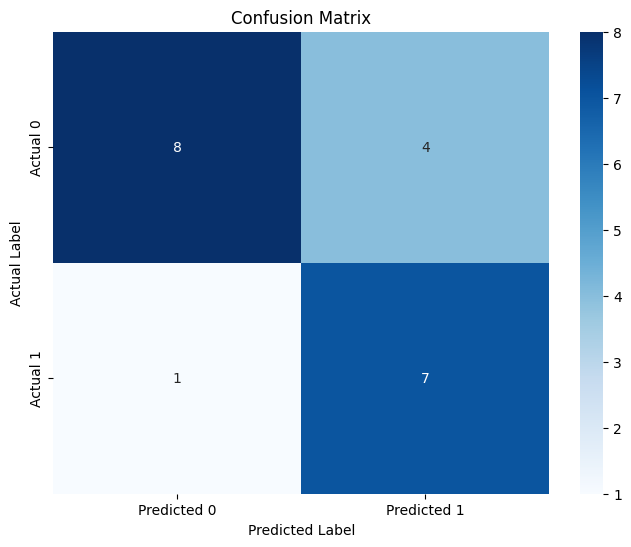

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined in your code
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a table
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:")
print(conf_matrix_df)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


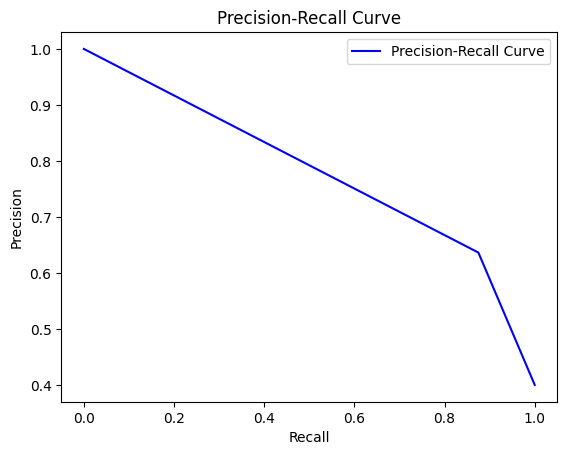

In [11]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have the model and X_test defined in your code
# Model should be trained before using this code snippet

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


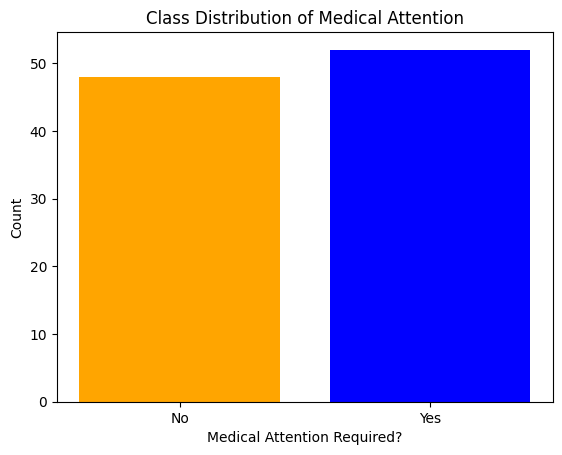

In [12]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Medical Attention Required?(Yes or No)' is the target variable
class_distribution = data['Medical Attention Required?(Yes or No)'].value_counts()

# Plot a bar chart
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'orange'])
plt.xlabel('Medical Attention Required?')
plt.ylabel('Count')
plt.title('Class Distribution of Medical Attention')
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 corresponds to 'No' and 1 corresponds to 'Yes'
plt.show()


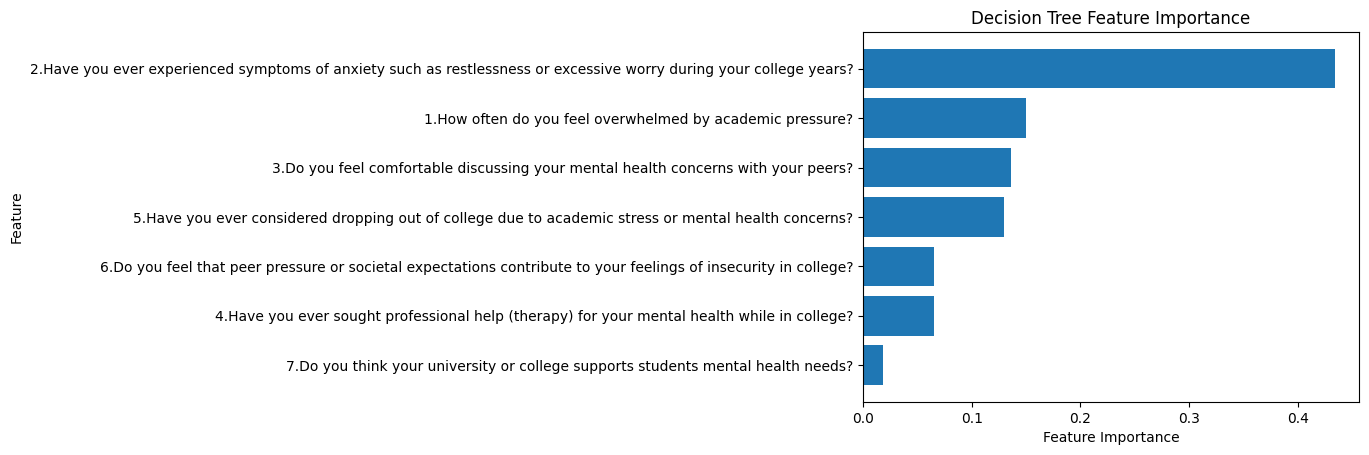

In [13]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained Decision Tree model and 'X_train' is your feature matrix
# Model should be trained before using this code snippet

# Get feature importances from the model
feature_importance = model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort features based on importance
sorted_idx = feature_importance.argsort()

# Plot a horizontal bar chart
plt.barh(range(len(feature_names)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(feature_names)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


In [14]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace the column names with the ones relevant to your dataset
descriptive_stats = data.describe(include='all')

# You can choose specific columns if needed
# descriptive_stats = data[['column1', 'column2', ...]].describe(include='all')

# Transpose the DataFrame for a more readable format
descriptive_stats = descriptive_stats.T

# Print the descriptive statistics table
print("Descriptive Statistics Table:")
print(descriptive_stats)


Descriptive Statistics Table:
                                                    count  mean       std  \
1.How often do you feel overwhelmed by academic...  100.0  4.22  0.905427   
2.Have you ever experienced symptoms of anxiety...  100.0  3.50  0.858705   
3.Do you feel comfortable discussing your menta...  100.0  3.72  0.805035   
4.Have you ever sought professional help (thera...  100.0  2.64  0.882146   
5.Have you ever considered dropping out of coll...  100.0  2.56  0.756387   
6.Do you feel that peer pressure or societal ex...  100.0  3.18  0.857292   
7.Do you think your university or college suppo...  100.0  2.92  0.981444   
Medical Attention Required?(Yes or No)              100.0  0.52  0.502117   

                                                    min  25%  50%  75%  max  
1.How often do you feel overwhelmed by academic...  2.0  4.0  4.0  5.0  5.0  
2.Have you ever experienced symptoms of anxiety...  2.0  3.0  3.0  4.0  5.0  
3.Do you feel comfortable discussing your 

In [15]:
import pandas as pd
import joblib
import numpy as np

# Load your dataset
data = pd.read_csv(r"C:\Users\hp\project_cao\CAO.csv")

# Load your trained model
model = joblib.load('decision_tree_model.joblib')

while True:
    # Provide a form for user input
    # Prorvide the input in the form of:
    #Often= 5
    #Sometimes= 4
    #Rarely= 3
    #Never= 2
    user_input = {
        '1.How often do you feel overwhelmed by academic pressure?': 0,
        '2.Have you ever experienced symptoms of anxiety such as restlessness or excessive worry during your college years?': 0,
        '3.Do you feel comfortable discussing your mental health concerns with your peers?': 0,
        '4.Have you ever sought professional help (therapy) for your mental health while in college?': 0,
        '5.Have you ever considered dropping out of college due to academic stress or mental health concerns?': 0,
        '6.Do you feel that peer pressure or societal expectations contribute to your feelings of insecurity in college?': 0,
        '7.Do you think your university or college supports students mental health needs?': 0,
    }

    for column in user_input:
        user_input[column] = float(input(f"{column} (Enter a number): "))

    # Create a DataFrame from the user input
    user_input_df = pd.DataFrame([user_input])

    # Make predictions
    user_prediction = model.predict(user_input_df)

    # Display the prediction
    if user_prediction[0] == 1:
        print('Mental Health Stable')
    else:
        print('Mental Health Unstable')

    # Ask if the user wants to continue
    another_prediction = input("Do you want to make another prediction? (yes/no): ").lower()
    if another_prediction != 'yes':
        break


Mental Health Unstable
